In [1]:
# from core import readfiles
import numpy as np
import os
import multiprocessing as mul
import matplotlib.pyplot as plt
from numba import jit, njit, prange, set_num_threads, vectorize, guvectorize, cuda
from tqdm import tqdm
from core.signal_bag import *
from core.stacking_analysis import *
from core.req_vectors import *
import pickle
import scipy.stats as st
import scipy.interpolate as interp
# import torch
# from core import weights

read icdata
read uptdata
read eadata
read mspdata


In [5]:
gammaraysrc1ra=np.concatenate([lhsaao1ra, hess_ra], 0)
gammaraysrc1dec=np.concatenate([lhsaao1dec, hess_dec], 0)
gammaraysrc2ra=np.concatenate([lhsaao2ra, hess_ra], 0)
gammaraysrc2dec=np.concatenate([lhsaao2dec, hess_dec], 0)

In [6]:
lhsaao1fnu_nor=lhsaao1fnu/np.sum(lhsaao1fnu)
lhsaao2fnu_nor=lhsaao2fnu/np.sum(lhsaao2fnu)
hessfnu=np.asfarray([float(i) for i in hessdata['Flux \xa0(max)\xa0[C.U.]'].values], dtype=str)



In [8]:

nan_col = np.count_nonzero(hessfnu!= hessfnu)
if nan_col != 0: 
    not_nan = hessfnu[hessfnu == hessfnu]  
    hessfnu[np.isnan(hessfnu)] = np.mean(not_nan) 
print(hessfnu)

[0.25       0.19       0.09       0.66       0.05       0.02
 0.25       0.06       0.17       0.08       0.132      0.12
 0.06       0.24       0.07       0.018      0.05       0.15
 0.025      0.2        0.17       0.07       1.1        0.02
 0.02       0.03       0.75       0.02       3.         1.
 0.07       0.06       0.035      0.13       0.16       0.16
 0.016      0.14       0.12       0.11       0.1        0.013
 0.17       0.08       0.013      0.02       0.015      0.03
 0.03       0.03       0.03       0.018      0.13914024 0.13914024
 0.013      0.02       0.13       0.047      0.07       0.01
 0.003      0.17       0.13914024 0.02       0.008      0.009
 0.004      0.13914024 0.13914024 0.025      0.04       0.014
 0.02       0.04       0.0065     0.015      0.006      0.01
 0.018      0.13914024 0.015      0.01       0.13914024 0.007
 0.04       0.13914024 0.005      0.006      0.13914024 0.007
 0.006      0.13914024 0.13914024 0.13914024 0.13914024]


In [9]:
hessnu_nor=hessfnu/np.sum(hessfnu)
print(hessnu_nor)

[0.01891314 0.01437399 0.00680873 0.04993069 0.00378263 0.00151305
 0.01891314 0.00453915 0.01286094 0.0060522  0.00998614 0.00907831
 0.00453915 0.01815661 0.00529568 0.00136175 0.00378263 0.01134788
 0.00189131 0.01513051 0.01286094 0.00529568 0.08321782 0.00151305
 0.00151305 0.00226958 0.05673942 0.00151305 0.22695768 0.07565256
 0.00529568 0.00453915 0.00264784 0.00983483 0.01210441 0.01210441
 0.00121044 0.01059136 0.00907831 0.00832178 0.00756526 0.00098348
 0.01286094 0.0060522  0.00098348 0.00151305 0.00113479 0.00226958
 0.00226958 0.00226958 0.00226958 0.00136175 0.01052632 0.01052632
 0.00098348 0.00151305 0.00983483 0.00355567 0.00529568 0.00075653
 0.00022696 0.01286094 0.01052632 0.00151305 0.00060522 0.00068087
 0.00030261 0.01052632 0.01052632 0.00189131 0.0030261  0.00105914
 0.00151305 0.0030261  0.00049174 0.00113479 0.00045392 0.00075653
 0.00136175 0.01052632 0.00113479 0.00075653 0.01052632 0.00052957
 0.0030261  0.01052632 0.00037826 0.00045392 0.01052632 0.0005

In [10]:
gammaraysrc1funor=np.concatenate([lhsaao1fnu_nor, hessnu_nor], 0)
gammaraysrc2funor=np.concatenate([lhsaao2fnu_nor, hessnu_nor], 0)
print(gammaraysrc2funor.shape)

(164,)


In [11]:
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import MaxNLocator, NullLocator
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator,LogitLocator,NullFormatter,FixedLocator)
import matplotlib

In [12]:
num_threads = int(mul.cpu_count()*0.9)
set_num_threads(num_threads)

In [13]:
len(gammaraysrc1ra)

170

In [14]:
# UNCOMMENT FOR LINEAR BINS
# all_enu = np.linspace(10**11.001, 10**18.999, 1000)
all_enu = e_nu_wall

# enus = 0.5*(all_enu[1:]+all_enu[:-1])
# UNCOMMENT FOR DENSER LOGARITHMIC BINS, optimal nbins is 1e6
enus = np.logspace(11.001, 18.999, int(1e6))
#print(e_nu_wall)
#print (np.where(enus>1.58489319e+11))


In [15]:
print(t_upt1,t_upt)

[32517530.86263724 30549103.12022511 27306301.28745167 28768007.01455351
 28682826.74322606 31358092.38190586 32027175.11202246 31566502.10216402
 30873121.15708538 35478964.62749199] [35318439.34329611 32497618.3151043  29902901.99932829 31745765.00015999
 32053797.00057632 33098838.99984006 34788962.99980783 33936928.00012794
 31302372.99945645 36107635.00003202]


In [17]:
enus_bin_indices = np.zeros(len(enus), dtype=np.int64)

for i in prange(len(enus)):
    enus_bin_indices[i] = np.digitize(enus[i], e_nu_wall) -1
print (enus_bin_indices)

[ 0  0  0 ... 39 39 39]


In [75]:
p2

69

In [19]:
msdec
print(dec_nu)

[-90.   -73.74 -66.93 -61.64 -57.14 -53.13 -49.46 -46.05 -42.84 -39.79
 -36.87 -34.06 -31.33 -28.69 -26.1  -23.58 -21.1  -18.66 -16.26 -13.89
 -11.54  -9.21  -6.89  -4.59  -2.29   0.     2.29   4.59   6.89   9.21
  11.54  13.89  16.26  18.66  21.1   23.58  26.1   28.69  31.33  34.06
  36.87  39.79  42.84  46.05  49.46  53.13  57.14  61.64  66.93  73.74
  90.  ]


In [20]:
ladec_bin_indices = np.zeros(len(gammaraysrc1ra), dtype=np.int64)
for i in prange(len(gammaraysrc1ra)):
    ladec_bin_indices[i] = np.digitize(gammaraysrc1dec[i], dec_nu) - 1
print(ladec_bin_indices)

[45 48 47 42 42 41 46 45 44 45 45 39 34 34 40 29 32 27 31 16 29 19 17 17
 18 19 19 20 20 21 22 22 22 23 24 24 24 25 25 26 27 27 29 27 30 31 31 31
 32 32 33 32 34 35 36 36 37 37 29 38 38 37 39 41 39 40 38 41 41 42 44 45
 46 46 46  5  5  6  9 12 13 15 17 19 21 21  6  6  8  8  9 12  3  6 12  2
  2  6 12 15 18  7 29 40 34  3  3  3  6 10 26 25 16  3  2  2 18 27 29 33
 30  9 27 15 14 14 14 33 19 11  9 22  1  2  3 14  7  7 25  8  8  8  7 21
 12  3 34 14 10 28 14 25 16  6  7 16 20 14  9 10 25  1  1  7 12  1  3 40
 23  3]


In [21]:
gamma_arr = [-2.0, -2.4, -2.53,-3, -3.5]
phio = np.logspace(-38, -20, 1000) #CHANGING TO LINEAR BINS RESULTS IN STRAIGHT LINES

# print("\nNumber of threads: ", num_threads)
print("\nNumber of energy bins: ",len(enus))
print("\nNumber of phi bins: ", len(phio))
print("\nCalculating weights...\n\n")


Number of energy bins:  1000000

Number of phi bins:  1000

Calculating weights...




In [22]:
eareaa = [i.astype(np.float64) for i in earea]
eareaa = np.asfarray(eareaa, dtype=np.float64)
print(earea.shape)
eareaa[0][0]
earea2 = np.asfortranarray(earea)
earea2 = earea2[0].astype(np.float64)

(5, 2000)


In [23]:
@vectorize(['float64(int64, float64, int64)'], nopython=True, target='parallel')
def psr_wt_sing_gamma(psrno,gamma, season):

    tt_upt = t_upt1[season]
    l = ladec_bin_indices[psrno]
    wt_ac_temp = np.zeros(len(enus), dtype=np.float64)
    for i in prange(len(enus)):
        wt_ac_temp[i] = np.float64(tt_upt * earea[ea_season(season)][l*40 + enus_bin_indices[i]] * enus[i]**gamma)   


    return np.trapz(wt_ac_temp, enus)


In [37]:
ea_season(5)

4

In [24]:
w_models = np.column_stack([np.ones(len(gammaraysrc1ra)),gammaraysrc1funor]).T.astype(np.float64)
sum_wt_model = [1, np.sum(1/(msdist**2)), np.sum(mss1400)]
print(len(w_models))
print(w_models.shape)

2
(2, 170)


/var/folders/2c/m969qfc90tv80w3gmnb7x8r80000gn/T/ipykernel_663/95634517.py:2: RuntimeWarning: divide by zero encountered in divide
  sum_wt_model = [1, np.sum(1/(msdist**2)), np.sum(mss1400)]


In [25]:


print(w_models[-1])
altier_path = [os.getcwd() + '/pickle1/', os.getcwd() + '/../pickle1/']
print(os.listdir(altier_path[0]))

[0.00194301 0.02007772 0.0086552  0.00141309 0.00070655 0.00105982
 0.00547574 0.00341498 0.00630005 0.00500471 0.00317946 0.0011187
 0.03668158 0.01725153 0.00836081 0.00317946 0.02602449 0.00553462
 0.03709374 0.05569948 0.00241404 0.00836081 0.02472916 0.07006594
 0.04274611 0.0299105  0.05946773 0.01507301 0.03173575 0.00912624
 0.01801696 0.01784032 0.01236458 0.03644607 0.01937117 0.00965615
 0.01095148 0.01895902 0.01048045 0.00918512 0.04039096 0.0033561
 0.0089496  0.00264955 0.00465144 0.00141309 0.00264955 0.00794866
 0.01460198 0.00423928 0.00376825 0.00129534 0.01101036 0.00235516
 0.00665332 0.00247292 0.00953839 0.00494583 0.00158973 0.00088318
 0.00329722 0.00270843 0.02313943 0.00206076 0.01348328 0.00294395
 0.00947951 0.00047103 0.01507301 0.00270843 0.00812529 0.01000942
 0.02802638 0.02608337 0.01195243 0.01891314 0.01437399 0.00680873
 0.04993069 0.00378263 0.00151305 0.01891314 0.00453915 0.01286094
 0.0060522  0.00998614 0.00907831 0.00453915 0.01815661 0.005295

In [26]:
altier_path = [os.getcwd() + '/pickle1/', os.getcwd() + '/../pickle1/']
if f'wt_acc_{len(enus)}_bins.pkl' in os.listdir(altier_path[0]):# or f'wt_acc.pkl_{len(enus)}' in os.listdir(altier_path[1]):
    print("Loading wt_acc from pickle")
    # try:
    #     wt_acc = pickle.load(altier_path[1] + f'wt_acc.pkl_{len(enus)//2}_bins')
    # except:
    with open(altier_path[0] + f'wt_acc_{len(enus)}_bins.pkl', 'rb') as f:
        wt_acc = pickle.load(f)
    
    
    print("Loaded wt_acc from pickle with nbins= ", len(enus))

else:
    print("Calculating wt_acc for all pulsars and seasons and gamma")
    wt_acc = []
    for gamma in prange(len(gamma_arr)):
        wt_allpsr = []
        for season in tqdm(prange(10)):
            # tmp = []
            # for psrno in prange(p):
                # w_model = w_models[psrno]
                # tmp.append(psr_wt_sing_gamma(psrno, gamma_arr[gamma], season))
                # tmp.append(trapz_numba(psr_wt_sing_e_gamma(psrno, enus, gamma_arr[gamma], season), enus))

            wt_allpsr.append(np.array(psr_wt_sing_gamma(prange(len(gammaraysrc1ra)), gamma_arr[gamma], season), dtype=np.float64))
            # tmp = []
        wt_acc.append(wt_allpsr)
        wt_allpsr = []
        
    wt_acc = np.asfarray(wt_acc, dtype=np.float64)
    print
    with open(altier_path[0] + f'wt_acc_{len(enus)}_bins.pkl', 'wb') as f:
        pickle.dump(wt_acc, f)
    print("Calculated wt_acc for all gamma-ray sources and seasons and gamma")

Loading wt_acc from pickle
Loaded wt_acc from pickle with nbins=  1000000


In [28]:
print(wt_acc.shape)

(5, 10, 170)


In [29]:
season_walls = np.asarray([0, 36900, 143911, 237044, 373288, 486146, 608687, 735732, 865043, 988700, 1134450])
season_widts= np.diff(season_walls)
print (season_widts)

[ 36900 107011  93133 136244 112858 122541 127045 129311 123657 145750]


In [30]:
#Compute the signal PDF for all neutrinos as per eqns 6, 7 and weights as per eqn 8 of 2205.15963

@njit(nogil=True)
def S_ijk(nu): 

    '''
    Calculates S_ij as in EQN 7 of 2205.15963
    ----------

    Parameters
    ----------
    nu : int
        Index of the neutrino in the sample
        
    
    Returns
    -------
        Returns the signal PDF for the {psrno}th pulsar and nuind_inp neutrino
    '''
    ang2 = hvovec(gammaraysrc1ra, gammaraysrc1dec, icra[nu], icdec[nu], rad=True) ** 2      #rad**2
    sg = np.deg2rad(icang[nu]) ** 2                                     #rad**2
    return np.divide(np.exp(-1 * np.divide(ang2, 2*sg)), (2 * np.pi * sg))      #1/rad**2


@njit(nogil=True)
def S_ik(nu, weight, w_models, gamma_index, ws):

    '''
    
    Calculates S_i as in EQN 8 of 2205.15963
    ----------

    Parameters
    ----------
    nu : int
        Index of the neutrino in the sample

    normalized_wt : array
        Normalized weights of the pulsars


    gamma_index : int
        Index of the gamma value in the gamma array

    ws : int
        Index of the weight model

    Returns
    -------
        Returns the signal PDF for the {psrno}th pulsar and nuind_inp neutrino

    '''

    # si_sing_season_g =
    # for i in prange(p):
        # sij = S_ijk(nu)
        # np.sum(np.multiply(sij, normalized_wt[i][gamma_index][season]))      #1/rad**2



    sij = S_ijk(nu)
    season = 0
    for i in range(10):
        if season_walls[i] <= nu and nu < season_walls[i+1]:
            season = i
            break

    return np.sum(np.multiply(sij, np.multiply(w_models[ws], weight[gamma_index][season])/np.sum(np.multiply(w_models[ws], weight[gamma_index][season]))))  #1/rad**2
    print(weight[gamma_index][season])

In [26]:
S_ik(10000, wt_acc, w_models, 4, 0)

1.0351886644377344e-114

In [31]:
@njit(parallel=True, nogil=True)
def Sik_sing_s_g(gamma_index, ws):#, wt_acc=wt_acc, w_models=w_models):
    '''
    Calculates S_i as in EQN 8 of 2205.15963
    ----------

    Parameters
    ----------
    weight : array
         weights of the pulsars

    season : int
        Season of the neutrino

    gamma_index : int
        Index of the gamma value in the gamma array

    ws : int
        Index of the weight model

    Returns
    -------
        Returns the signal PDF for the {psrno}th pulsar and nuind_inp neutrino
    '''



    tmp = []
    if ws == -1: #No weights
        for nu in prange(len(icra)):
            tmp.append(np.sum(S_ijk(nu)))
        return np.array(tmp, dtype=np.float64)

    for nu in prange(len(icra)):
        tmp.append(S_ik(nu, wt_acc, w_models, gamma_index, ws))
    return np.array(tmp, dtype=np.float64)

In [101]:
for gamma_index in tqdm(prange(5)):
    print(Sik_sing_s_g(gamma_index, 0))

 20%|███████▊                               | 1/5 [00:03<00:13,  3.49s/it]

[2.48290754e-224 2.46707761e-169 1.22828308e+001 ... 7.12334119e-002
 0.00000000e+000 0.00000000e+000]


 40%|███████████████▌                       | 2/5 [00:04<00:06,  2.19s/it]

[2.33190125e-224 3.67615260e-170 1.06719110e+001 ... 9.58234882e-002
 0.00000000e+000 0.00000000e+000]


 60%|███████████████████████▍               | 3/5 [00:06<00:03,  1.77s/it]

[2.03534006e-224 5.49160212e-171 9.09041106e+000 ... 1.03703785e-001
 0.00000000e+000 0.00000000e+000]


 80%|███████████████████████████████▏       | 4/5 [00:07<00:01,  1.56s/it]

[8.58594417e-228 8.95507830e-169 1.42680351e-002 ... 3.52187474e-006
 0.00000000e+000 0.00000000e+000]


100%|███████████████████████████████████████| 5/5 [00:08<00:00,  1.71s/it]

[1.00558481e-224 7.64391739e-169 4.75096553e+000 ...             nan
             nan             nan]


In [32]:
#Pickle
if os.path.isfile(altier_path[0] + f'all_Si_ws_g_s_{len(enus)}_bins.pkl'):
    print("Loading all_Si_ws_g_s from pickle")
    with open(altier_path[0] + f'all_Si_ws_g_s_{len(enus)}_bins.pkl', 'rb') as f:
        all_Si_ws_g_s = pickle.load(f)
    print("Loaded all_Si_ws_g_s from pickle with nbins =", len(enus))
else:


    print("\nCalculating S_i for all neutrinos and gammas and weighting schemes...\n")

    all_Si_ws_g_s = []
    #tmp = []
    tmp_wt_acc_uniform = []
    tmp_wt_acc_w_flux = []
    #tmp_wt_acc_w_s1400 = []

    for gamma_index in tqdm(prange(len(gamma_arr))):
        # for season in tqdm(prange(10)):
        #tmp.append(Sik_sing_s_g(gamma_index, -1))
        tmp_wt_acc_uniform.append(Sik_sing_s_g(gamma_index, 0))
        tmp_wt_acc_w_flux.append(Sik_sing_s_g(gamma_index, 1))
        #tmp_wt_acc_w_s1400.append(Sik_sing_s_g(gamma_index, 2))


    all_Si_ws_g_s.append([tmp_wt_acc_uniform, tmp_wt_acc_w_flux])
    #tmp = []
    tmp_wt_acc_uniform = []
    tmp_wt_acc_w_flux = []
    #tmp_wt_acc_w_s1400 = []
    all_Si_ws_g_s = np.asfarray(all_Si_ws_g_s[0])

    print("Calculated S_i for all neutrinos and gammas and weighting schemes")
    #Save to pickle
    with open(altier_path[0] + f'all_Si_ws_g_s_{len(enus)}_bins.pkl', 'wb') as f:
        pickle.dump(all_Si_ws_g_s, f)




Loading all_Si_ws_g_s from pickle
Loaded all_Si_ws_g_s from pickle with nbins = 1000000


In [33]:
all_Si_ws_g_s

array([[[2.48291269e-224, 2.46707793e-169, 1.22828308e+001, ...,
         7.12334119e-002, 0.00000000e+000, 0.00000000e+000],
        [2.41028695e-224, 6.05453639e-170, 1.11957594e+001, ...,
         9.20742889e-002, 0.00000000e+000, 0.00000000e+000],
        [2.33190609e-224, 3.67615307e-170, 1.06719110e+001, ...,
         9.58234882e-002, 0.00000000e+000, 0.00000000e+000],
        [2.03534429e-224, 5.49160283e-171, 9.09041106e+000, ...,
         1.03703785e-001, 0.00000000e+000, 0.00000000e+000],
        [1.83394086e-224, 6.72792858e-172, 8.26729593e+000, ...,
         1.07755848e-001, 0.00000000e+000, 0.00000000e+000]],

       [[3.15004089e-225, 2.17751110e-169, 3.27456308e+000, ...,
         8.87413536e-002, 0.00000000e+000, 0.00000000e+000],
        [2.98409307e-225, 5.21491547e-170, 2.91271049e+000, ...,
         1.13162781e-001, 0.00000000e+000, 0.00000000e+000],
        [2.86860138e-225, 3.14612155e-170, 2.75868104e+000, ...,
         1.17398697e-001, 0.00000000e+000, 0.000000

In [34]:
# @jit(nopython=True)
@vectorize(['float64(int64, int64)'], nopython=True,target='parallel')
def Bi_stacked_compute(nu, cone=5):

    '''
    Calculates B_i as in EQN 9 of 2205.15963
    ----------

    Parameters
    ----------
    nu : int
        Index of the neutrino from IceCube sample
    cone : float
        Cone angle in degrees.
    

    Returns
    -------
    float
        Returns the background PDF for the {nu}th neutrino
    '''

    # count = np.sum(np.abs(np.subtract(icdec, icdec[nu])) <= cone)
    count=0
    for i in prange(len(icdec)):
        if abs(icdec[i] - icdec[nu]) <= cone:
            count+=1
    binwidth = (np.sin(np.deg2rad(icdec[nu] + cone)) - np.sin(np.deg2rad(icdec[nu] - cone)))*2*np.pi
    return count/(binwidth * N_ic)           #No units or sr**-1

In [35]:
#Pickle
if os.path.isfile(altier_path[0] + f'all_Bi.pkl'):
    print("Loading all_Bi from pickle...")
    with open(altier_path[0] + f'all_Bi.pkl', 'rb') as f:
        all_Bi = pickle.load(f)
    print("Loaded all_Bi from pickle")
else:
    print("\nCalculating Bi for all neutrinos\n")
    all_Bi = Bi_stacked_compute(np.arange(lnu), 5)
    # all_Bi+=1e-90
    print("\nCalculated Bi for all neutrinos")
    #Save to pickle
    with open(altier_path[0] + f'all_Bi.pkl', 'wb') as f:
        pickle.dump(all_Bi, f)

Loading all_Bi from pickle...
Loaded all_Bi from pickle


 '''
    This function returns the number of signal events for a single pulsar as in EQN3 of 2205.15963
    -------------------

    Parameters
    ----------
    dec : float
        The declination of the pulsar in radians
    
    enu : float
        The neutrino energy in eV

    gamma : float
        The spectral index of the neutrino flux

    phi0 : float (optional)
        The normalization constant of the neutrino flux

    season : int (optional)
        The IceCube season number
    
    Returns
    -------
    float
        The number of signal events for the given parameters
    '''


In [36]:
# type(msdec_bin_indices[0])
print (len(all_Bi))

1134450


In [37]:
arr = np.zeros(10, dtype=np.float64)

In [38]:
t_upt

array([35318439.34329611, 32497618.3151043 , 29902901.99932829,
       31745765.00015999, 32053797.00057632, 33098838.99984006,
       34788962.99980783, 33936928.00012794, 31302372.99945645,
       36107635.00003202])

In [39]:
#generates ns^ for a single pulsar a single season and a single energy


# @vectorize(['float64(int64, float64, int64)'], nopython=True, target='parallel')
# def psr_wt_sing_gamma(psrno,gamma, season):

#     tt_upt = t_upt[season]
#     l = msdec_bin_indices[psrno]
#     wt_ac_temp = np.zeros(len(enus), dtype=np.float64)
#     for i in prange(len(enus)):
#         wt_ac_temp[i] = np.float64(tt_upt * earea[ea_season(season)][l*40 + enus_bin_indices[i]] * enus[i]**gamma)


#     return np.trapz(wt_ac_temp, enus)
# @njit
# @vectorize(['float64(float64, float64, float64, int64)'], target='parallel')
@vectorize(['float64(int64, float64, float64, int64)'], nopython=True, target='parallel')
def ns_singleseason_sing_psr_HAT(psrno,gamma, phi0, season):
   

    tt_upt = t_upt[season]
    # if enu <= 1e11 or enu >= 1e19:
    #     return 0.0
    # else:
        # k=0
    l = ladec_bin_indices[psrno]
        # for i in range(0, len(e_nu_wall)):
        #     if e_nu_wall[i] <= enu and e_nu_wall[i+1] > enu:
        #         k=i
        #         break

        # for j in range(0, len(dec_nu)):
        #     if dec_nu[j] <= dec and dec_nu[j+1] > dec:
        #         l=j
        #         break
    ns_temp = np.zeros(len(enus), dtype=np.float64)
    for i in prange(len(enus)):
        ns_temp[i] += np.float64(tt_upt * earea[ea_season(season)][l*40 + enus_bin_indices[i]] * phi0 * (enus[i]/(10**14))**gamma)
    # temp_ea = np.asarray(earea[ea_season(season)])[l*40 + k]
    # return tt_upt * temp_ea * phi0 * ((enu/(10**14))**gamma)     #in s cm2 eV

    return np.trapz(ns_temp, enus)     #in s cm2 eV


In [218]:
# def ns_HAT_all_season_all_psr_sing_gamma_wt_wtht_weights(gamma, e_nus=enus, phi0=1):
#     # ns_hat = 0
#     ns_hat_wt = 0
#     # ns_hat_wt_dist = 0
#     # ns_hat_wt_s1400 = 0
#     for season in tqdm(prange(10)):
#         # for psr in prange(p):
#             # wt = all_weights[0][gamma_arr.index(gamma)][psr][ea_season(season)]
#         wt_sum = np.sum(wt_acc[gamma_arr.index(gamma)][season])

#         wt = wt_acc[gamma_arr.index(gamma)][season]
#         ns_hat = ns_singleseason_sing_psr_HAT(prange(len(gammaraysrc1ra
#                                                         )), gamma, phi0, season)
#         # ns_hat_wt += np.dot(wt, nsop)
#         # ns_hat_wt_dist += np.dot(wt/msdist[prange(p)]**2, nsop)
#             # nsop = ns_singleseason_sing_psr_HAT(msdec[psr], e_nus, gamma, phi0, season)
            
#             # ns_hat += np.trapz(nsop, x=e_nus)
        
#     #         ns_hat_wt += wt * np.trapz(nsop, x=e_nus)
#     #         ns_hat_wt_dist += wt * np.trapz(nsop, x=e_nus) / (msdist[psr]**2)
#     #         ns_hat_wt_s1400 += wt * np.trapz(nsop, x=e_nus) * mss1400[psr]
#     # return np.array([ns_hat, ns_hat_wt, ns_hat_wt_dist, ns_hat_wt_s1400], dtype=np.float64)

#         ns_hat_wt += np.dot((wt/wt_sum),  ns_hat)
#         # ns_hat_wt_dist += np.dot(wt * w_models[1]/ np.sum(np.multiply(wt_acc[gamma_arr.index(gamma)][season], w_models[1])) , ns_hat)
#         # ns_hat_wt_s1400 += np.dot(wt * w_models[2]/ np.sum(np.multiply(wt_acc[gamma_arr.index(gamma)][season], w_models[2])), ns_hat)
#     return np.array([ns_hat_wt], dtype=np.float64)

In [40]:
def ns_HAT_all_season_all_psr_sing_gamma_wt_wtht_weights(gamma, e_nus=enus, phi0=1):
    # ns_hat = 0
    ns_hat_wt_uniform = 0
    ns_hat_wt_fnu = 0
    # ns_hat_wt_s1400 = 0
    for season in tqdm(prange(10)):
        wt_sum = np.sum(wt_acc[gamma_arr.index(gamma)][season])
        wt = wt_acc[gamma_arr.index(gamma)][season]
        ns_hat = ns_singleseason_sing_psr_HAT(prange(len(gammaraysrc1ra
                                                        )), gamma, phi0, season)
        # ns_hat_wt += np.dot((wt/wt_sum),  ns_hat)
        # ns_hat_wt_fnu=np.dot(wt * w_models[1]/ np.sum(np.multiply(wt_acc[gamma_arr.index(gamma)][season], w_models[1])) , ns_hat)
        # ns_hat_wt_uniform += np.dot(w_models[0]/ np.sum(w_models[0]) , ns_hat)
        # ns_hat_wt_fnu += np.dot(wt*w_models[1]/ np.sum(w_models[1]), ns_hat)
        ns_hat_wt_uniform += np.dot(wt * w_models[0]/ np.sum(np.multiply(wt_acc[gamma_arr.index(gamma)][season], w_models[0])) , ns_hat)
        ns_hat_wt_fnu += np.dot(wt * w_models[1]/ np.sum(np.multiply(wt_acc[gamma_arr.index(gamma)][season], w_models[1])), ns_hat)

    return np.array([ns_hat_wt_uniform, ns_hat_wt_fnu], dtype=np.float64)

In [41]:
#Pickle
arr = []
if os.path.isfile(altier_path[0] + f'ns_all_ws_{len(enus)}_bins.pkl'):
    print("Loading ns_hat from pickle...")
    with open(altier_path[0] + f'ns_all_ws_{len(enus)}_bins.pkl', 'rb') as f:
        arr = pickle.load(f)
    print("Loaded ns_hat from pickle with nbins =", len(enus))
else:
    print("\nCalculating ns_HAT for all gamma and weighting schemes...\n")

    arr=[]
    for gamma in prange(len(gamma_arr)):
        tmp = ns_HAT_all_season_all_psr_sing_gamma_wt_wtht_weights(gamma_arr[gamma])
        np.savetxt('outputs2/ns_hat_wt_wt_gamma_{}.txt'.format(gamma_arr[gamma]), tmp)
        arr.append(tmp)
        tmp = []

    arr = np.array(arr, dtype=np.float64)
    with open(altier_path[0] + f'ns_all_ws_{len(enus)}_bins.pkl', 'wb') as f:
        pickle.dump(arr, f)
    print("\nCalculationed ns_HAT for all gamma and weighting schemes")

Loading ns_hat from pickle...
Loaded ns_hat from pickle with nbins = 1000000


In [61]:
arr

array([[1.57883957e+29, 1.51310831e+29],
       [3.29102511e+29, 3.24576346e+29],
       [4.77130065e+29, 4.73595375e+29],
       [2.72854276e+30, 2.74702356e+30],
       [2.89298020e+31, 2.93352987e+31]])

In [42]:
@njit(parallel=True, nogil=True)
def season_nu(nu):
    for i in prange(10):
        if nu >= season_walls[i] and nu < season_walls[i+1]:
            return i

t2mp = all_Si_ws_g_s[0][0]
nsa = 50
@njit(nogil=True)
def TS_for_all_psrs2(nsa):  
    return Ts_arr2(nsa, t2mp, all_Bi, Ns) 

TS_for_all_psrs2(nsa)

In [43]:
@jit(nopython=True)
def Pr(x, Ns, S, B):
    nsN = x/Ns
    return np.add(np.multiply(nsN , S), np.multiply(np.subtract(1, nsN), B))



@njit(nogil=True)
def TS_st_vec(x, S, B, Ns):
    nsN = x/Ns
    pr = np.add(np.multiply(nsN , S), np.multiply(np.subtract(1, nsN), B))
    return np.sum(np.asfarray(2*np.log(pr/B)))

lnu = 1134450
Ns = lnu#np.count_nonzero(nuind+1)


TS_st_vec(0.5e6, all_Si_ws_g_s[0][0], all_Bi, Ns)

In [44]:
phio = np.logspace(-38, -20, 1000)
print(phio)

[1.00000000e-38 1.04236067e-38 1.08651577e-38 1.13254132e-38
 1.18051653e-38 1.23052400e-38 1.28264983e-38 1.33698374e-38
 1.39361927e-38 1.45265393e-38 1.51418933e-38 1.57833141e-38
 1.64519059e-38 1.71488197e-38 1.78752553e-38 1.86324631e-38
 1.94217468e-38 2.02444651e-38 2.11020343e-38 2.19959307e-38
 2.29276931e-38 2.38989257e-38 2.49113003e-38 2.59665597e-38
 2.70665207e-38 2.82130768e-38 2.94082017e-38 3.06539530e-38
 3.19524751e-38 3.33060034e-38 3.47168682e-38 3.61874981e-38
 3.77204249e-38 3.93182876e-38 4.09838367e-38 4.27199397e-38
 4.45295851e-38 4.64158883e-38 4.83820966e-38 5.04315949e-38
 5.25679112e-38 5.47947234e-38 5.71158648e-38 5.95353313e-38
 6.20572881e-38 6.46860766e-38 6.74262224e-38 7.02824426e-38
 7.32596543e-38 7.63629826e-38 7.95977700e-38 8.29695852e-38
 8.64842328e-38 9.01477631e-38 9.39664831e-38 9.79469667e-38
 1.02096066e-37 1.06420924e-37 1.10928986e-37 1.15628013e-37
 1.20526094e-37 1.25631660e-37 1.30953502e-37 1.36500781e-37
 1.42283046e-37 1.483102

In [45]:
print('\nCALCULATING TS FOR ALL PSRS FOR ALL GAMMAS FOR ALL WEIGHTS\n')

all_TSS = []
for ws in prange(2):
    tmpp = []
    print("ws = {}".format(ws))
    for gamma in prange(len(gamma_arr)):
        print("gamma = {}".format(gamma))
        # tmp = np.zeros(len(phio))
        # for season in tqdm(range(10)):
        t2mp = np.asfarray(all_Si_ws_g_s[ws][gamma])
        @njit(nogil=True)
        def TS_for_all_psrs2(nsa):  
            return TS_st_vec(nsa, t2mp, all_Bi, Ns)      #No units
        temp = []
        for phi in tqdm(prange(len(phio))):
            temp.append(TS_for_all_psrs2(arr[gamma][ws]*phio[phi]))
        tmpp.append(temp)
        temp = []
    all_TSS.append(tmpp)
    tmpp = []

print('\nCALCULATED TS FOR ALL PSRS FOR ALL GAMMAS FOR ALL WEIGHTS')


CALCULATING TS FOR ALL PSRS FOR ALL GAMMAS FOR ALL WEIGHTS

ws = 0
gamma = 0


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:11<00:00, 87.77it/s]


gamma = 1


100%|██████████| 1000/1000 [00:10<00:00, 93.24it/s]


gamma = 2


100%|██████████| 1000/1000 [00:10<00:00, 93.75it/s]


gamma = 3


100%|██████████| 1000/1000 [00:10<00:00, 95.44it/s]


gamma = 4


100%|██████████| 1000/1000 [00:10<00:00, 94.70it/s] 


ws = 1
gamma = 0


100%|██████████| 1000/1000 [00:10<00:00, 93.72it/s]


gamma = 1


100%|██████████| 1000/1000 [00:10<00:00, 94.35it/s]


gamma = 2


100%|██████████| 1000/1000 [00:10<00:00, 93.99it/s]


gamma = 3


100%|██████████| 1000/1000 [00:10<00:00, 94.71it/s] 


gamma = 4


100%|██████████| 1000/1000 [00:10<00:00, 95.51it/s]


CALCULATED TS FOR ALL PSRS FOR ALL GAMMAS FOR ALL WEIGHTS


In [46]:
all_TSS = np.array(all_TSS, dtype=np.float64)
print(all_TSS.shape)
all_TSS[0][2]

(2, 5, 1000)


array([ 1.90410354e-10,  3.46447093e-10,  2.76723533e-10,  2.10522710e-10,
        1.69136261e-10,  1.55954361e-10,  1.61152425e-10,  1.95307104e-10,
        2.37678321e-10,  3.07992076e-10,  3.99202893e-10,  2.87722512e-10,
        4.40298686e-10,  3.46953799e-10,  3.17783355e-10,  2.82494694e-10,
        3.08925108e-10,  3.53178153e-10,  4.34865255e-10,  5.50664625e-10,
        4.44305925e-10,  3.87546439e-10,  6.32528474e-10,  6.52619514e-10,
        4.67034855e-10,  5.68648462e-10,  7.26428251e-10,  6.98163527e-10,
        6.95507429e-10,  7.61234409e-10,  6.28613384e-10,  7.96869459e-10,
        7.84639242e-10,  8.27261815e-10,  9.39942124e-10,  8.82751205e-10,
        8.74117667e-10,  9.56824619e-10,  1.11300014e-09,  1.09549747e-09,
        1.16170251e-09,  1.07397868e-09,  1.32642008e-09,  1.16622156e-09,
        1.35484646e-09,  1.40215173e-09,  1.55684954e-09,  1.57908042e-09,
        1.45982537e-09,  1.71708425e-09,  1.59941194e-09,  1.86687044e-09,
        1.77070136e-09,  

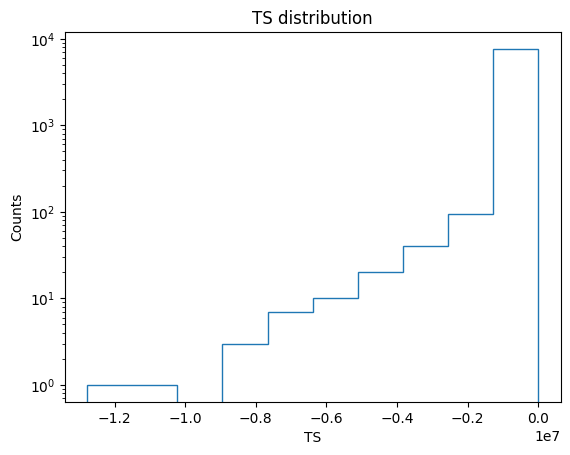

In [83]:
# for i in range(1, len(all_TSS)):
plt.figure()
histdetails = plt.hist(np.ravel(all_TSS[:]), bins=10, density=False, histtype='step')
# plt.ylim(0, 1000)
plt.yscale('log')
plt.xlabel('TS')
plt.ylabel('Counts')
plt.title('TS distribution')
plt.show()

histdetails = np.histogram(np.ravel(all_TSS[1:]), bins=10)

In [84]:
histdetails

(array([1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 7.000e+00, 1.000e+01,
        2.000e+01, 4.000e+01, 9.300e+01, 7.598e+03]),
 array([-1.27760839e+07, -1.14984751e+07, -1.02208664e+07, -8.94325761e+06,
        -7.66564886e+06, -6.38804012e+06, -5.11043137e+06, -3.83282262e+06,
        -2.55521387e+06, -1.27760512e+06,  3.62294331e+00]),
 [<matplotlib.patches.Polygon at 0x1345c1e20>])

In [85]:
max(np.ravel(all_TSS[1][:]))

6.36681818348595e-11

np.count_nonzero(np.ravel(all_TSS[1:])> )

In [86]:
all_TSS = np.array(all_TSS, dtype=np.float64)

In [45]:
all_TSS.shape

(2, 5, 1000)

In [87]:
for w in range(2):
    for g in range(len(gamma_arr)):
        print(min(all_TSS[w][g]), max(all_TSS[w][g]))
        # np.savetxt(f'TS_w{w}_g{g}.txt', all_TSS[w][g])
        
    print('wt\n')

with open(altier_path[0] + f'all_TSS_{len(enus)}_bins.pkl', 'wb') as f:
    pickle.dump(all_TSS, f)

-7938459.112936995 3.308401413256082
-7039081.372264593 3.622943311814534
-6931027.207299854 3.489417320886514
-7025409.178530411 3.061551798413294
-6827171.306457343 2.7886222183405565
wt

-7940011.586684313 6.36681818348595e-11
-10529382.983902585 5.5392135315897995e-11
-12776083.853687536 -5.859091012188953e-12
-7551701.681173635 -4.593709861468381e-10
-7833779.663094846 -5.720986400820554e-09
wt



In [88]:
#Plotting

all_TSS = np.asarray(all_TSS)
gamma_arr = np.asarray(gamma_arr)

all_e_UL = []
e_decade = [1e13, 1e14, 1e15, 1e16, 1e17]
for e_UL in e_decade:
    e2dfde = []

    for gamma in prange(len(gamma_arr)):
        temp = []
        for phi in range(len(phio)):
            temp.append( e_UL**2 * dfde(e_UL, gamma_arr[gamma], phio[phi]))        #in eV
        e2dfde.append(temp)
    e2dfde = np.asarray(e2dfde)

    all_e_UL.append(e2dfde)
mark = ['^', 'o', 's', 'd']

In [89]:
print(len(all_e_UL))

5


In [93]:
for i in all_e_UL:
    print(i.shape)
    print('next energy bin')

(5, 1000)
next energy bin
(5, 1000)
next energy bin
(5, 1000)
next energy bin
(5, 1000)
next energy bin
(5, 1000)
next energy bin


In [92]:

all_e_UL=np.asarray(all_e_UL)

In [94]:
print(all_e_UL)

[[[1.00000000e-10 1.04236067e-10 1.08651577e-10 ... 9.20373200e+07
   9.59360829e+07 1.00000000e+08]
  [2.51188643e-10 2.61829163e-10 2.72920423e-10 ... 2.31187295e+08
   2.40980545e+08 2.51188643e+08]
  [3.38844156e-10 3.53197823e-10 3.68159521e-10 ... 3.11863080e+08
   3.25073810e+08 3.38844156e+08]
  [1.00000000e-09 1.04236067e-09 1.08651577e-09 ... 9.20373200e+08
   9.59360829e+08 1.00000000e+09]
  [3.16227766e-09 3.29623387e-09 3.43586456e-09 ... 2.91047561e+09
   3.03376532e+09 3.16227766e+09]]

 [[1.00000000e-10 1.04236067e-10 1.08651577e-10 ... 9.20373200e+07
   9.59360829e+07 1.00000000e+08]
  [1.00000000e-10 1.04236067e-10 1.08651577e-10 ... 9.20373200e+07
   9.59360829e+07 1.00000000e+08]
  [1.00000000e-10 1.04236067e-10 1.08651577e-10 ... 9.20373200e+07
   9.59360829e+07 1.00000000e+08]
  [1.00000000e-10 1.04236067e-10 1.08651577e-10 ... 9.20373200e+07
   9.59360829e+07 1.00000000e+08]
  [1.00000000e-10 1.04236067e-10 1.08651577e-10 ... 9.20373200e+07
   9.59360829e+07 1.00

In [95]:
all_TSS[0].shape

(5, 1000)

In [96]:
for w in range(1):
    for g in range(0,4):
        print(phio[np.argmax(all_TSS[w][g])])

7.3259654282152e-24
3.47168681892656e-24
2.3898925662310525e-24
4.184288507901576e-25


In [97]:
max(all_TSS[1][1])

5.5392135315897995e-11

In [64]:
tete = np.float64('2.543345761304638e-23 9.396648314954749e-24 1.4526539259467783e-24 2.3408272761782943e-23 8.296958520834915e-24 1.2305240043592616e-24 1.61141427725301e-23 5.711586478126447e-24 8.470868266557419e-25'.split(' '))

In [65]:
tete[2::3].mean()

1.1767549189872607e-24

In [98]:
# e2dfde = all_e_UL[1][2]
# dist_g25 = interp.interp1d(all_TSS[1][2], e2dfde/1e9)

# print(dist_g25(-3.84))

all_UL = []
for ws in range(2):
    ul_all_gamma = []
    for gamma in prange(len(gamma_arr)):
        temp = []
        for i in all_e_UL:
            #print(len(all_TSS[ws][gamma]))
            print(len(i[gamma]/1e9))
            dist_g = interp.interp1d(all_TSS[ws][gamma], i[gamma]/1e9)
            print()
            temp.append(dist_g(-3.84))

        ul_all_gamma.append(temp)
    all_UL.append(ul_all_gamma)
len(all_UL[1])

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000

1000



5

In [99]:
phio_paper = 1.68*3e-18
phio_paper_low=1.46*3e-18
phio_paper_high=1.87*3e-18 
spectral_index= -2.58
spectral_index_high=-2.49
spectral_index_low=-2.68

ic_e_paper = np.logspace(np.log10(15e12), np.log10(5e15))
print(ic_e_paper)
e2dfde_ic = 1e10 * dfde(1e14, spectral_index, phio_paper)
e2dfde_ic_low =1e10 * dfde(1e14, spectral_index, phio_paper_low)
e2dfde_ic_high=1e10 * dfde(1e14, spectral_index, phio_paper_high)
########e2dfde_ic @ 100TeV   in GeV unit###########
print(phio_paper * ((1e14/(10**14))**spectral_index))
print(e2dfde_ic)

[1.50000000e+13 1.68880140e+13 1.90136678e+13 2.14068725e+13
 2.41013042e+13 2.71348775e+13 3.05502794e+13 3.43955698e+13
 3.87248576e+13 4.35990625e+13 4.90867719e+13 5.52652061e+13
 6.22213049e+13 7.00529513e+13 7.88703481e+13 8.87975696e+13
 9.99743065e+13 1.12557833e+14 1.26725217e+14 1.42675816e+14
 1.60634078e+14 1.80852704e+14 2.03616200e+14 2.29244883e+14
 2.58099386e+14 2.90585736e+14 3.27161065e+14 3.68340043e+14
 4.14702121e+14 4.66899682e+14 5.25667224e+14 5.91831696e+14
 6.66324131e+14 7.50192750e+14 8.44617712e+14 9.50927716e+14
 1.07061871e+15 1.20537491e+15 1.35709256e+15 1.52790654e+15
 1.72022047e+15 1.93674050e+15 2.18051338e+15 2.45496936e+15
 2.76397046e+15 3.11186479e+15 3.50354775e+15 3.94453089e+15
 4.44101953e+15 5.00000000e+15]
5.039999999999999e-18
5.0399999999999995e-08


In [100]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
yellow_patch = mpatches.Patch(color='grey',alpha=0.5,edgecolor=None,linewidth=0)
blue_dotted_line = mlines.Line2D([], [], linewidth=2, linestyle='solid', color='grey')
orange_line = mlines.Line2D([], [], linewidth=2, color='orange')
firebrick_line=mlines.Line2D([], [], linewidth=2, color='firebrick')
olivedrab_line=mlines.Line2D([], [], linewidth=2, color='olivedrab')
dodgerblue_line=mlines.Line2D([], [], linewidth=2, color='dodgerblue')
magenta_line=mlines.Line2D([], [], linewidth=2, color='purple')
dashed_line=mlines.Line2D([0], [2],linestyle='--', color='k', lw=2)

[-4.94845720e-10 -4.59370986e-10 -5.76507065e-10 -5.88580296e-10
 -4.98332931e-10 -5.41499290e-10 -7.30900452e-10 -7.89851296e-10
 -7.34667661e-10 -7.97516054e-10 -7.22453209e-10 -7.58458186e-10
 -9.01348997e-10 -8.81874575e-10 -9.59365255e-10 -8.68084051e-10
 -1.11063225e-09 -1.16488508e-09 -1.03147580e-09 -1.20363275e-09
 -1.17274568e-09 -1.18022858e-09 -1.21423383e-09 -1.26189459e-09
 -1.32115874e-09 -1.37979228e-09 -1.42865165e-09 -1.69743064e-09
 -1.68651760e-09 -1.61895298e-09 -1.75433002e-09 -1.81476723e-09
 -2.03171169e-09 -2.15476482e-09 -2.15987473e-09 -2.28158004e-09
 -2.25794007e-09 -2.31923037e-09 -2.45021804e-09 -2.63364775e-09
 -2.84674152e-09 -2.81862002e-09 -3.03185767e-09 -2.96346593e-09
 -3.34457375e-09 -3.39851748e-09 -3.60027499e-09 -3.67516264e-09
 -3.84226342e-09 -4.08456360e-09 -4.11082726e-09 -4.40279949e-09
 -4.41995155e-09 -4.63413156e-09 -4.75969867e-09 -5.01082468e-09
 -5.35557736e-09 -5.49740658e-09 -5.65043262e-09 -6.02194633e-09
 -6.31953407e-09 -6.49354

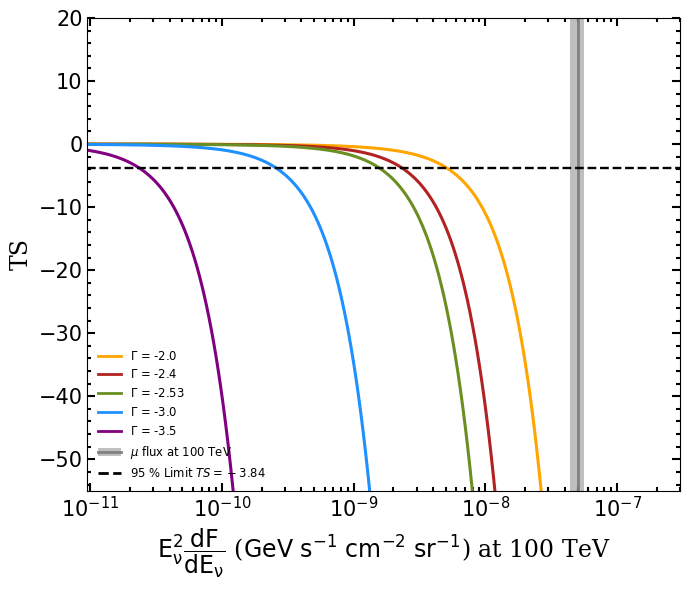

In [101]:
e2dfde = all_e_UL[1]
# plt.style.use('default')
font = {'family': 'serif',
        'weight': 'bold',
        'size': 22,
        'color':  'black',
        }
smallerfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 17,
        }
minor_x_array=np.logspace(-12,-6,50)
fig, axs = plt.subplots(1,1, figsize=(7, 6))
c_arr=['orange','firebrick','olivedrab','dodgerblue','purple']
# c_arr=['orange','firebrick','olivedrab','dodgerblue','magenta']
if os.path.exists(os.getcwd() + "/outputs3/stacking_TS_max2_1.txt"):
        os.remove(os.getcwd()+"/outputs3/stacking_TS_max2_1.txt")
with open(os.getcwd()+"/outputs3/stacking_TS_max2_1.txt","a+") as f:
        
        for gamma in [0, 1, 2, 3, 4]:#range(4):
        
        #     for i in range(1):
                # axs.plot(e2dfde[gamma]/1e9, all_TSS[0][gamma], label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2,c=c_arr[gamma])# + ' with wt')    #in GeV
                axs.plot(e2dfde[gamma]/1e9, all_TSS[1][gamma],  lw=2.2,c=c_arr[gamma])# + ' with wt')    #in GeV
                all_TSS[1][gamma]=np.nan_to_num(all_TSS[1][gamma], nan=0.0)
                # print(e2dfde[gamma][3]/1e9)
                if gamma ==3:
                        print(all_TSS[1][gamma] )
                f.write(str(e2dfde[gamma][np.where(all_TSS[1][gamma]==np.max(all_TSS[1][gamma]))[0][0]]/1e9)+ "    "+str(np.max(all_TSS[1][gamma])) + '\n')
f.close()               
        # axs.set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)
# axs[1].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = \dfrac{1}{d_{DM}^2}}}$' , fontdict=smallerfont)
# axs[2].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = s_{1400}}}$', fontdict=smallerfont)
# axs.axvspan(e2dfde_ic_low, e2dfde_ic_high, facecolor ='grey', alpha = 0.5,linewidth=3,label='$\mu$ flux at 100 TeV(IceCube)') 
# axs.vlines(e2dfde_ic,  -55, 20, lw=2, color='grey')
axs.axvspan(e2dfde_ic_low, e2dfde_ic_high, facecolor ='grey', alpha = 0.5,linewidth=3) 
axs.vlines(e2dfde_ic,  -55, 20, lw=2, color='grey')
# for i in range(3):
    
# axs.text(1e-8,0.6,'95 % UPPER LIMIT $TS = -3.84$')    
# axs.annotate('95 % UPPER LIMIT $TS = -3.84$',xy=(0.6,0.6),xytext=(0.8,0.8), arrowprops=dict(facecolor='black',shrink=0.6,width=2))
axs.set_xlabel('$\mathsf{{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ ($\mathsf{{GeV}}$ $\mathsf{{s^{-1}}}$ $\mathsf{{cm^{-2}}}$ $\mathsf{{sr^{-1}}}$) at 100 TeV', fontdict=axesfont)
axs.set_ylabel('TS', fontdict=axesfont)
axs.xaxis.set_tick_params(labelsize=15)
axs.yaxis.set_tick_params(labelsize=15)
axs.tick_params(which='major', width=1.5, length=6,direction='in')
axs.tick_params(which='minor', width=1.5, length=3,direction='in')
axs.set_ylim(-55, 20)
axs.set_xlim(0.95e-11, 3e-7)
#axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(which='minor', length=3, color='k')
axs.tick_params(axis='x', which='minor', bottom=True,top=True)
axs.tick_params(axis='x', which='major', bottom=True,top=True)
axs.tick_params(axis='y', which='minor', right=True)
axs.tick_params(axis='y', which='major', right=True)
# axs.hlines(-3.84,  0.95e-11, 3e-7,linestyles='dashed', lw=1.7, ls='--', label='95 % Limit $TS = -3.84$', color='k')
axs.hlines(-3.84,  0.95e-11, 3e-7,linestyles='dashed', lw=1.7, ls='--', color='k')
axs.xaxis.set_minor_locator(FixedLocator(minor_x_array))
axs.xaxis.set_minor_formatter(NullFormatter())
#plt.suptitle('TS vs Total Neutrino Flux at 100 TeV', fontweight='bold', fontsize=16, fontfamily='serif')
# axs.legend(prop={'size':12}, framealpha=0)
axs.set_xscale('log')

plt.tight_layout()
plt.legend([orange_line, firebrick_line, olivedrab_line,dodgerblue_line,magenta_line,(yellow_patch, blue_dotted_line),\
dashed_line], ['$\Gamma$ = -2.0', '$\Gamma$ = -2.4','$\Gamma$ = -2.53','$\Gamma$ = -3.0','$\Gamma$ = -3.5',\
'$\mu$ flux at 100 TeV','95 % Limit $TS = -3.84$'],fancybox=False,edgecolor=None,frameon=False,fontsize='small',loc=3)
plt.savefig(f'outputs3/fig4_1.pdf')
# plt.show()
print(f'\nTS_vs_E2dfde_all_w_model_bins={len(enus)}.png\nDONE')

In [75]:
gama=list(np.random.normal(2.58,0.1,100))
Phi=list(np.random.normal(1.68,0.2,100))
all_e_UL = []
e_decade = [1e13, 1e14, 1e15, 1e16, 1e17]
x = np.logspace(13.2041, 15.41497, 50)
x=list(x)
# print(x)
e2dfde = []
e_UL_GeV=[]
def model(xm,gm,ph):
    '''
    Parameters
    ----------
    e_nu : float
        The neutrino energy in eV
    
    gamma : float
        The spectral index of the neutrino flux
    
    phi0 : float (optional)
        The normalization constant of the neutrino flux in eV^-1. The default is 1e-40.
    
    Returns
    -------
    float
        The differential flux of neutrinos
    '''
    e2dfde = []
    for e_UL in xm:
    
    # e_UL_GeV.append(e_UL*1e-9)
    # for gamma in prange(len(gamma_arr)):
    # temp = []
    # for phi in range(len(phio)):
    

        e2dfde.append(3e-18*(e_UL*1e-9)**2 * ph * ((e_UL/(10**14))**(-1*gm)))        #in eV
    # e2dfde.append(temp)
    e2dfde = np.asarray(e2dfde)
    return e2dfde      #eV^-1

    # all_e_UL.append(e2dfde)

In [77]:
ysample=np.asarray([model(x,gama[i],Phi[i]) for i in range(len(gama))])

In [78]:
lower=np.percentile(ysample,(100-68.26)/2,axis=0)
upper=np.percentile(ysample,(100-68.26)/2+68.26,axis=0)

In [82]:
len(lower)

50

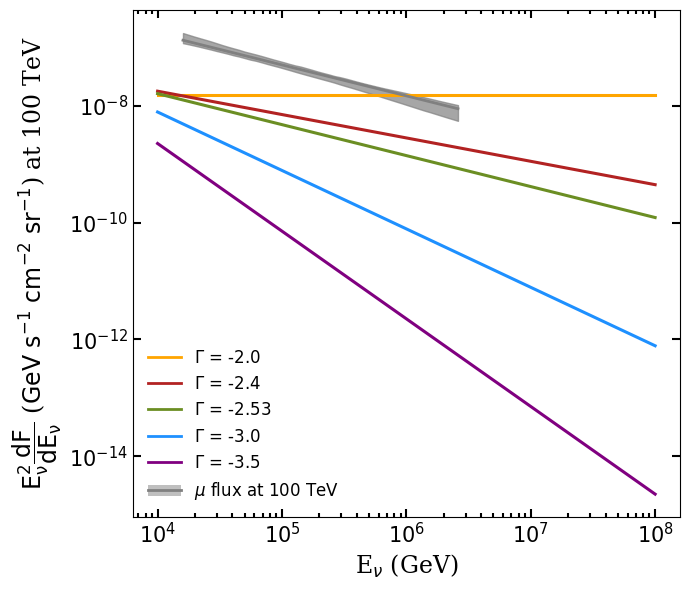

In [79]:
fig, axs = plt.subplots(1,1, figsize=(7, 6))
minor_y_array=np.logspace(-12,-6,50)
for gamma in range(0, len(gamma_arr)):

    axs.plot(np.divide(e_decade, 1e9), np.multiply(all_UL[1][gamma], 3), label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2, ls='-',c=c_arr[gamma])# + ' with wt')    #in GeV
    

axs.set_xlabel('E$_{\u03BD}$ (GeV)', fontdict=axesfont)
axs.set_ylabel('$\mathsf{{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ ($\mathsf{{GeV}}$ $\mathsf{{s^{-1}}}$ $\mathsf{{cm^{-2}}}$ $\mathsf{{sr^{-1}}}$) at 100 TeV', fontdict=axesfont)
axs.xaxis.set_tick_params(labelsize=15)
axs.yaxis.set_tick_params(labelsize=15)
axs.tick_params(which='major', width=1.5, length=6,direction='in')
axs.tick_params(which='minor', width=1.5, length=3,direction='in')

#axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator(20))
axs.tick_params(which='minor', length=3, color='k')
# axs.set_xscale('log')
axs.tick_params(axis='x', which='minor', bottom=True,top=True)
axs.tick_params(axis='x', which='major', bottom=True,top=True)
axs.tick_params(axis='y', which='minor', right=True)
axs.tick_params(axis='y', which='major', right=True)
# axs.yaxis.set_minor_locator(FixedLocator(minor_y_array))
# axs.yaxis.set_minor_formatter(NullFormatter())
axs.legend(prop={'size':14}, framealpha=0, loc='lower left')

#x = np.linspace(e_decade[:-2][0], e_decade[1:-1][-1], 11)
# x=x*1e-9
# y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve and estimate its y-values and their error.
# a, b = np.polyfit(x, y, deg=1)
# y_est = 3e-18*x*x*1.66* np.divide(x,1e5)**(-2.53)
# y_est_up =3e-18*x*x*1.91* np.divide(x,1e5)**(-2.60)
# y_est_low =3e-18*x*x*1.39* np.divide(x,1e5)**(-2.46)
# y_err = np.divide(x, 1e9).std() * np.sqrt(1/len(x) +
#                           (np.divide(x, 1e9) - np.divide(x, 1e9).mean())**2 / np.sum((np.divide(x, 1e9) - np.divide(x, 1e9).mean())**2))


axs.plot(np.divide(x,1e9), model(x,2.53,1.66), '-',c='grey',linewidth=2)

# axs.plot(x, y_est_low, '-',c='grey',linewidth=1)
# axs.plot(x, y_est_up, '-',c='grey',linewidth=1)
axs.fill_between(np.divide(x,1e9),lower, upper, color='grey',alpha=0.7,label='$\\nu$ flux(IceCube)')
# axs.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)

# axs.plot(x, y, 'o', color='tab:brown')
# axs[0].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)
# axs[1].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = \dfrac{1}{d_{DM}^2}}}$' , fontdict=smallerfont)
# axs[2].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = s_{1400}}}$', fontdict=smallerfont)
# axs.legend(prop={'size':12}, framealpha=0)
# axs.set_ylim(4e-9, 3e-7)
# axs.set_xlim(1e4, 1e8)
axs.set_xscale('log')
# plt.minorticks_on()
axs.set_yscale('log')
# plt.suptitle('95% UL of Total Energy Flux vs Neutrino Energy', fontweight='bold', fontsize=20, fontfamily='serif')
plt.tight_layout()
plt.legend([orange_line, firebrick_line, olivedrab_line,dodgerblue_line,magenta_line,(yellow_patch, blue_dotted_line)],\
    ['$\Gamma$ = -2.0', '$\Gamma$ = -2.4','$\Gamma$ = -2.53','$\Gamma$ = -3.0','$\Gamma$ = -3.5','$\mu$ flux at 100 TeV'],  fancybox=False,edgecolor=None,frameon=False,fontsize='large')
plt.savefig(f'outputs3/fig4_2.pdf')
plt.show()


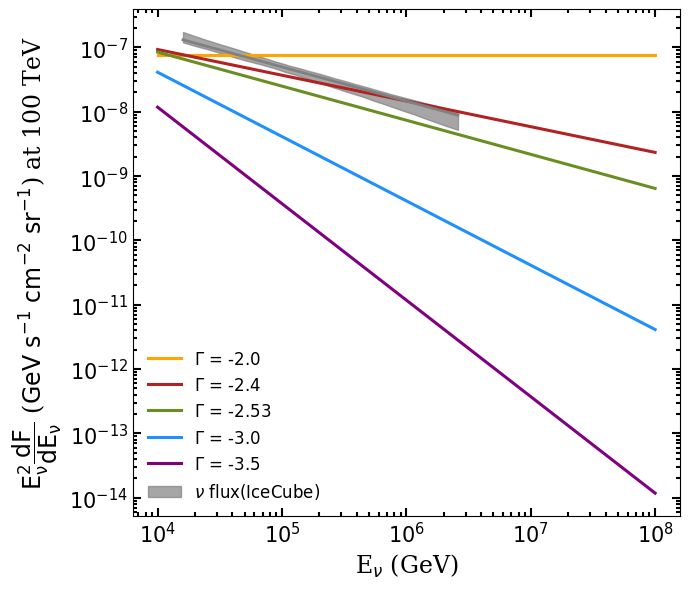

In [96]:
# fig, axs = plt.subplots(1,1, figsize=(7, 6))
# minor_y_array=np.logspace(-12,-6,50)
# for gamma in range(0, len(gamma_arr)):

#     axs.plot(np.divide(e_decade, 1e9), np.multiply(all_UL[0][gamma], 3), label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2, ls='-',c=c_arr[gamma])# + ' with wt')    #in GeV
    

# axs.set_xlabel('E$_{\u03BD}$ (GeV)', fontdict=axesfont)
# axs.set_ylabel('$\mathsf{{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ ($\mathsf{{GeV}}$ $\mathsf{{s^{-1}}}$ $\mathsf{{cm^{-2}}}$ $\mathsf{{sr^{-1}}}$) at 100 TeV', fontdict=axesfont)
# axs.xaxis.set_tick_params(labelsize=15)
# axs.yaxis.set_tick_params(labelsize=15)
# axs.tick_params(which='major', width=1.5, length=6,direction='in')
# axs.tick_params(which='minor', width=1.5, length=3,direction='in')

# #axs.xaxis.set_minor_locator(AutoMinorLocator())
# axs.yaxis.set_minor_locator(AutoMinorLocator())
# axs.tick_params(which='minor', length=3, color='k')
# # axs.set_xscale('log')
# axs.tick_params(axis='x', which='minor', bottom=True,top=True)
# axs.tick_params(axis='x', which='major', bottom=True,top=True)
# axs.tick_params(axis='y', which='minor', right=True)
# axs.tick_params(axis='y', which='major', right=True)
# # axs.yaxis.set_minor_locator(FixedLocator(minor_y_array))
# # axs.yaxis.set_minor_formatter(NullFormatter())
# axs.legend(prop={'size':14}, framealpha=0, loc='lower left')

# #x = np.linspace(e_decade[:-2][0], e_decade[1:-1][-1], 11)
# # x=x*1e-9
# # y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# # fit a linear curve and estimate its y-values and their error.
# # a, b = np.polyfit(x, y, deg=1)
# # y_est = 3e-18*x*x*1.66* np.divide(x,1e5)**(-2.53)
# # y_est_up =3e-18*x*x*1.91* np.divide(x,1e5)**(-2.60)
# # y_est_low =3e-18*x*x*1.39* np.divide(x,1e5)**(-2.46)
# # y_err = np.divide(x, 1e9).std() * np.sqrt(1/len(x) +
# #                           (np.divide(x, 1e9) - np.divide(x, 1e9).mean())**2 / np.sum((np.divide(x, 1e9) - np.divide(x, 1e9).mean())**2))


# axs.plot(np.divide(x,1e9), model(x,2.53,1.66), '-',c='grey',linewidth=2)

# # axs.plot(x, y_est_low, '-',c='grey',linewidth=1)
# # axs.plot(x, y_est_up, '-',c='grey',linewidth=1)
# axs.fill_between(np.divide(x,1e9),lower, upper, color='grey',alpha=0.7,label='$\\nu$ flux(IceCube)')
# # axs.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)

# # axs.plot(x, y, 'o', color='tab:brown')
# # axs[0].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)
# # axs[1].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = \dfrac{1}{d_{DM}^2}}}$' , fontdict=smallerfont)
# # axs[2].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = s_{1400}}}$', fontdict=smallerfont)
# axs.legend(prop={'size':12}, framealpha=0)

# # axs.set_ylim(4e-9, 3e-7)
# # axs.set_xlim(1e4, 1e8)
# axs.set_xscale('log')
# axs.set_yscale('log')
# # plt.suptitle('95% UL of Total Energy Flux vs Neutrino Energy', fontweight='bold', fontsize=20, fontfamily='serif')
# plt.tight_layout()
# plt.savefig(f'outputs1/UL_all_w_model_binskm2a={len(enus)}.pdf')
# plt.show()


[array(5.1327766e-09), array(5.1327766e-09), array(5.1327766e-09), array(5.1327766e-09), array(5.1327766e-09)]
[array(5.89259996e-09), array(2.3458863e-09), array(9.33914156e-10), array(3.71797922e-10), array(1.48015419e-10)]
[array(5.34488049e-09), array(1.57738606e-09), array(4.6551963e-10), array(1.37384583e-10), array(4.05450648e-11)]
[array(2.59323123e-09), array(2.59323123e-10), array(2.59323123e-11), array(2.59323123e-12), array(2.59323123e-13)]
[array(7.49937247e-10), array(2.3715098e-11), array(7.49937247e-13), array(2.3715098e-14), array(7.49937247e-16)]


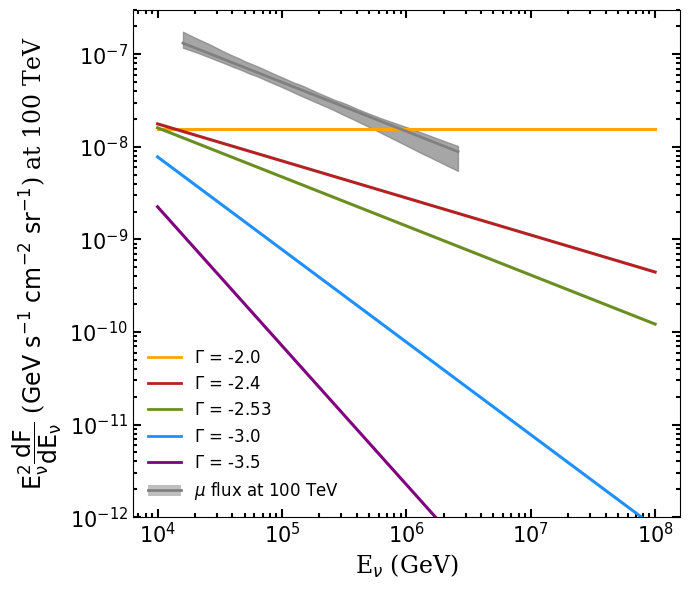

In [81]:
fig, axs = plt.subplots(1,1, figsize=(7, 6))
minor_y_array=np.logspace(-12,-6,50)
for gamma in range(0, len(gamma_arr)):

    axs.plot(np.divide(e_decade, 1e9), np.multiply(all_UL[1][gamma], 3), label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2, ls='-',c=c_arr[gamma])# + ' with wt')    #in GeV
    
    print(all_UL[1][gamma])
axs.set_xlabel('E$_{\u03BD}$ (GeV)', fontdict=axesfont)
axs.set_ylabel('$\mathsf{{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ ($\mathsf{{GeV}}$ $\mathsf{{s^{-1}}}$ $\mathsf{{cm^{-2}}}$ $\mathsf{{sr^{-1}}}$) at 100 TeV', fontdict=axesfont)
axs.xaxis.set_tick_params(labelsize=15)
axs.yaxis.set_tick_params(labelsize=15)
axs.tick_params(which='major', width=1.5, length=6,direction='in')
axs.tick_params(which='minor', width=1.5, length=3,direction='in')

#axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(which='minor', length=3, color='k')
# axs.set_xscale('log')
axs.tick_params(axis='x', which='minor', bottom=True,top=True)
axs.tick_params(axis='x', which='major', bottom=True,top=True)
axs.tick_params(axis='y', which='minor', right=True)
axs.tick_params(axis='y', which='major', right=True)
# axs.yaxis.set_minor_locator(FixedLocator(minor_y_array))
# axs.yaxis.set_minor_formatter(NullFormatter())
axs.legend(prop={'size':14}, framealpha=0, loc='lower left')

#x = np.linspace(e_decade[:-2][0], e_decade[1:-1][-1], 11)
# x=x*1e-9
# y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve and estimate its y-values and their error.
# a, b = np.polyfit(x, y, deg=1)
# y_est = 3e-18*x*x*1.66* np.divide(x,1e5)**(-2.53)
# y_est_up =3e-18*x*x*1.91* np.divide(x,1e5)**(-2.60)
# y_est_low =3e-18*x*x*1.39* np.divide(x,1e5)**(-2.46)
# y_err = np.divide(x, 1e9).std() * np.sqrt(1/len(x) +
#                           (np.divide(x, 1e9) - np.divide(x, 1e9).mean())**2 / np.sum((np.divide(x, 1e9) - np.divide(x, 1e9).mean())**2))


axs.plot(np.divide(x,1e9), model(x,2.53,1.66), '-',c='grey',linewidth=2)

# axs.plot(x, y_est_low, '-',c='grey',linewidth=1)
# axs.plot(x, y_est_up, '-',c='grey',linewidth=1)
axs.fill_between(np.divide(x,1e9),lower, upper, color='grey',alpha=0.7,label='$\\nu$ flux(IceCube)')
# axs.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)

# axs.plot(x, y, 'o', color='tab:brown')
# axs[0].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)
# axs[1].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = \dfrac{1}{d_{DM}^2}}}$' , fontdict=smallerfont)
# axs[2].set_title('Weighting scheme: $\mathsf{\mathbf{w_{acc}}}$; $\mathsf{\mathbf{w_{model} = s_{1400}}}$', fontdict=smallerfont)
axs.legend(prop={'size':12}, framealpha=0)
axs.set_ylim(1e-12, 3e-7)
# axs.set_xlim(1e4, 1e8)
axs.set_xscale('log')
axs.set_yscale('log')
# plt.suptitle('95% UL of Total Energy Flux vs Neutrino Energy', fontweight='bold', fontsize=20, fontfamily='serif')
plt.tight_layout()
plt.legend([orange_line, firebrick_line, olivedrab_line,dodgerblue_line,magenta_line,(yellow_patch, blue_dotted_line)],\
    ['$\Gamma$ = -2.0', '$\Gamma$ = -2.4','$\Gamma$ = -2.53','$\Gamma$ = -3.0','$\Gamma$ = -3.5','$\mu$ flux at 100 TeV'],  fancybox=False,edgecolor=None,frameon=False,fontsize='large')
# plt.savefig(f'outputs3/fig4_2.pdf')
plt.savefig(f'outputs3/fig4_2.pdf')
plt.show()


In [291]:
np.divide(e_decade, 1e9)*np.divide(e_decade, 1e9)*1.66*np.divide(e_decade,1e14)**-2.53

array([5.62481299e+10, 1.66000000e+10, 4.89900732e+09, 1.44579956e+09,
       4.26685700e+08])

In [294]:
# e2dfde = all_e_UL[1]
# plttitles = ['$w_{acc}$ and $w_{model} = 1$', '$w_{acc}$ and $w_{model} = \dfrac{1}{d_{DM}^2}$', '$w_{acc}$ and $w_{model} =  w_{s1400}$']

#         # print(st.t.interval(0.95, len(all_TSS[i][j])-1, loc=np.mean(all_TSS[i][j]), scale=st.sem(all_TSS[i][j])))
# for i in range(1, 4):
#     plt.figure(figsize=(8, 6))
#     for j in range(1, len(gamma_arr)):
#         plt.plot(e2dfde[j]/1e9, all_TSS[i][j], label='$\Gamma$ = ' + str(gamma_arr[j]), lw=0.8)
#         # ci = st.t.interval(0.95, len(all_TSS[i][j])-1, loc=np.mean(all_TSS[i][j]), scale=st.sem(all_TSS[i][j]))
#         # plt.hlines(ci, 1e-19, 1e-6, colors='k', linestyles='dashed', lw=0.5, ls='-.', label="95% CI "+ '$\Gamma$ = ' + str(gamma_arr[j]))

#     plt.hlines(-3.84, 1e-19, 1e-6, linestyles='dashed', lw=0.7, ls='-.', label='95 % UPPER LIMIT $TS = -3.84$')
#     # plt.vlines(dist_g25(-3.84), -120, 50, linestyles='dashed', lw=0.5, ls='-.')
#     plt.legend()
#     plt.xscale('log')
#     # plt.yscale('log')
#     plt.xlabel("$E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}$ (GeV)")
#     plt.ylabel(r'$TS$')
#     plt.ylim(-200, 50)
#     plt.title("TS vs Total Neutrino Flux at 100 TeV\nWeighting scheme: " + plttitles[i-1])
#     plt.savefig(os.getcwd() + f'/outputs/TSvsE2dFdE_ws_{i}.png', facecolor='w')
#     plt.show()

In [80]:
with open (os.getcwd()+'/outputs3/UL_values2_1.txt', 'a+') as f:
    for i in range(len(gamma_arr)):
        f.write(str(gamma_arr[i])+' '+str(all_UL[1][i][1])+'\n')
f.close()  

In [102]:
np.average(np.array([4.184288507901576e-06,3.931828755705786e-07]))

2.2887356917360773e-06

In [104]:
np.average(np.array([5.1327766e-19,2.3458863e-19,1.57738606e-19,2.59323123e-20,2.3715098e-21]))

1.8678174362e-19